# Interactivity

Interactivity is very similar to animation in matplotlib. For interactivity though, we have to head down to the artist layer a bit more and reference the canvas object of the current figure.

In [1]:
%matplotlib widget
# pip install ipympl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

12

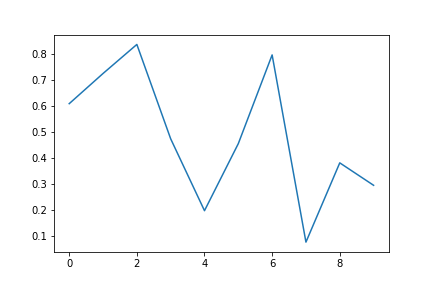

In [2]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    # clear the current axis
    plt.cla()
    # plot the data
    plt.plot(data)
    # set the title of the plot to current mouse location
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# connect the event to event listener
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

Pick event allows you to respond when the user is actually clicked on a visual element in the figure.

In [3]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.260860,0.140719,Brazil
1,0.480547,0.873502,Canada
2,0.183098,0.444417,China
3,0.187888,0.969970,USA
4,0.909588,0.329672,Iraq
5,0.775528,0.949072,UK
6,0.540152,0.378429,India
7,0.532064,0.287524,Chile
8,0.815361,0.064346,Mexico
9,0.898356,0.448142,Germany


12

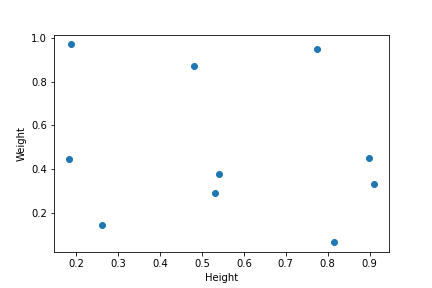

In [4]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

def onpick(event):
    # we use the dataframe iloc indexer to pull out the origin information
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)